K-L Divergence Lab 
------

There is a Random Variable with two states:

X ={🍭, 🍣}

There are two different Bernoulli distributions over those states (p, q):

p(🍭) = 1-r  
p(🍣) = r

q(🍭) = 1-s   
q(🍣) = s 

Solve the following by hand or write code.

1) What is D(p||q) when r = 1/2 and s = 1/4?

In [132]:
reset -fs

In [133]:
# Solution
from numpy import log2

r = 1/2 
s = 1/4

D = (1-r)*log2((1-r)/(1-s)) + r*log2(r/s) 
print(f"{D:.5}")

0.20752


2) What is __D(q||p)__ when r = 1/2 and s = 1/4?

In [134]:
D = (1-s)*log2((1-s)/(1-r)) + s*log2(s/r) 
print(f"{D:.5}")

0.18872


Given r = 1/2 and s = 1/4, are  D(p||q) and  D(q||p) the same? Why or Why not?

__Nope__. K-L is not symmetric

3) What is D(p||q) when r = 1/8 and __s = 7/8__?

In [135]:
# Solution
r = 1/8 
s = 7/8

D = (1-r)*log2((1-r)/(1-s)) + r*log2(r/s) 
print(f"{D:.5}")

2.1055


4) What is __D(q||p)__ when r = 1/8 and __s = 7/8__?

In [136]:
# Solution
D = (1-s)*log2((1-s)/(1-r)) + s*log2(s/r)  
print(f"{D:.5}")

2.1055


Given r = 1/8 and s = 7/8, now are D(p||q) and  D(q||p) the same? Why or Why not?

__Yes__. Even though K-L Divergence is not symmetric, they both same because identical is identical.

What is the generalized relationship between the values of p and q that would make computed K-L Divergence symmetric?

__Solution__: p = 1-q

-------
Create and compare Gaussians with K-L Divergence
------

HT: https://github.com/kgourgou/blog-RE-tolerance

In [137]:
reset -fs

In [138]:
import matplotlib.pyplot as pl
import numpy as np
from numpy import log2
import seaborn

%matplotlib inline

In [139]:
# Helper variables
mean = "mean"
std  = "std" 

__TODO__: Write a function to find the relative entropy between two univariate gaussians

In [140]:
# Solution
# The K-L Divergence in between two univariate gaussians
# https://stats.stackexchange.com/questions/7440/kl-divergence-between-two-univariate-gaussians
def gaussian_re(p: dict, q: dict) -> float:
    "Calculate the relative entropy between two univariate gaussians"
    return log2(q[std]/p[std])+(p[std]**2 + (p[mean]-q[mean])**2)/(2*q[std]**2)-0.5

Double check for same distributions
------


In [141]:
p = {mean : 0, 
    std : 0.31}

q = p.copy() # A separate copy of parameters

In [142]:
print('R(p|q) =', gaussian_re(p,q))

R(p|q) = 0.0


In [143]:
# Test that K-L Divergence is zero when comparing indentical distributions
assert gaussian_re(p,q) == 0

Plot distributions

In [150]:
def pdf(x,p):
    "Calculate the gaussian probability density at x"
    return np.exp(-(x-p[mean])**2/(2*p[std]**2))/(np.sqrt(2*np.pi*p[std]))

ValueError: x and y must have same first dimension, but have shapes (50,) and (1,)

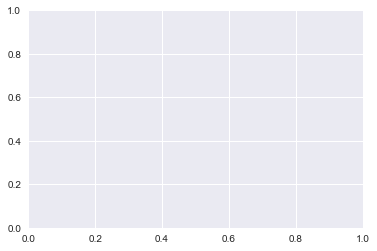

In [153]:
x = np.linspace(-3,3)

# Solutions
pl.plot(x, pdf(x,p))
pl.plot(x, pdf(x,q))
f = pl.gca();
f.axes.get_yaxis().set_ticklabels([]);

In [145]:
p = {mean : 1, 
     std : .5}
q = {mean : 3, 
     std : .5}

In [146]:
print('R(q|p)=', gaussian_re(p,q))

R(q|p)= 8.0


In [147]:
assert gaussian_re(p,q) == 8

Plot distributions

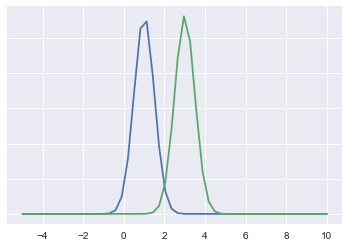

In [148]:
x = np.linspace(-5, 10);

# Solutions
pl.plot(x, pdf(x,p))
pl.plot(x, pdf(x,q))
f = pl.gca()

f.axes.get_yaxis().set_ticklabels([]);

Change the q distribution (without setting it equal to p) to reduce relative entropy.

R(q|p)= 2.0


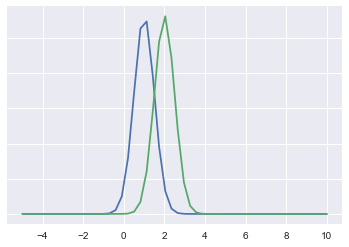

In [149]:
# Solution

p = {mean : 1, 
     std : .5}
q = {mean : 2, 
     std : .5}

print('R(q|p)=', gaussian_re(p,q))

x = np.linspace(-5, 10);

# Solutions
pl.plot(x, pdf(x,p))
pl.plot(x, pdf(x,q))
f = pl.gca()

f.axes.get_yaxis().set_ticklabels([]);

----
Challenge Activities
-----

![](images/challenge_1.png)

Source: Elements of Information Theory

__Solution__:

![](challenge_1_solution.png)

<br>
-----